In [1]:
import pandas as pd
import numpy as np
import pickle

## Gentoo Time Series

In [2]:
dfg2 = pd.read_excel('GentooDataTimeSeries.xlsx', header=0)
dfg2

,site name,site id,ccamlr region,Longitude EPSG:4326,Latitude EPSG:4326,common name,day,month,year,season starting,count,accuracy,count type,vantage,reference
0,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1984,1984,0,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
1,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1994,1994,14,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
2,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1995,1995,33,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
3,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1996,1996,45,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
4,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1997,1997,56,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
5,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1998,1998,26,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
6,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1999,1999,149,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
7,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2000,2000,296,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
8,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2001,2001,288,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
9,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2002,2002,639,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...


In [3]:
dfg2.columns

Index(['site name', 'site id', 'ccamlr region', 'Longitude EPSG:4326',
       'Latitude EPSG:4326', 'common name', 'day', 'month', 'year',
       'season starting', 'count', 'accuracy', 'count type', 'vantage',
       'reference'],
      dtype='object')

In [4]:
dfg2.drop(dfg2.columns.difference(['site name','year', 'count', 'accuracy', 'count type']), 1, inplace=True)
dfg2.head()

,site name,year,count,accuracy,count type
0,Biscoe Point,1984,0,1,nests
1,Biscoe Point,1994,14,1,nests
2,Biscoe Point,1995,33,1,nests
3,Biscoe Point,1996,45,1,nests
4,Biscoe Point,1997,56,1,nests


In [5]:
site_names = list(set(dfg2['site name']))
site_names

['Biscoe Point', 'Moot Point', 'Orne Islands', 'Vernadsky Station']

In [6]:
# Key for matching the accuracy
acc_key = {'1': 0.05, '2': 0.10, '3': 0.25, '4': 0.50, '5': 1}

In [7]:
GentooData = {}
for site in site_names:
    dfg2_local = dfg2[dfg2['site name']==site]
    # Find years for this site
    start_year = min(dfg2_local['year'])
    stop_year = max(dfg2_local['year'])
    years = np.arange(start_year, stop_year+1)
    # Dataframes for nest and chick counts
    dfg2_local_nests = dfg2_local[dfg2['count type']=='nests']
    dfg2_local_chicks = dfg2_local[dfg2['count type']=='chicks']
    # Years nest and chick counts were collected
    nest_years = dfg2_local_nests['year'].to_list()
    chick_years = dfg2_local_chicks['year'].to_list()
    # Obtain counts and accuracy
    nest_counts = dfg2_local_nests['count'].to_list()
    chick_counts = dfg2_local_chicks['count'].to_list()
    nest_acc = dfg2_local_nests['accuracy'].to_list()
    chick_acc = dfg2_local_chicks['accuracy'].to_list()
    # Initialize array to store counts and accuracy
    data = np.ones((2, len(years)))*np.nan
    err = np.ones((2, len(years)))*np.nan
    for i, year in enumerate(nest_years):
        data[0][year==years] = nest_counts[i]
        err[0][year==years] = acc_key[str(nest_acc[i])]
    for i, year in enumerate(chick_years):
        data[1][year==years] = chick_counts[i]
        err[1][year==years] = acc_key[str(chick_acc[i])]
    GentooData[site+' Counts'] = data
    GentooData[site+' Years'] = years
    GentooData[site+' Errors'] = err

<ipython-input-7-2fd730e81584>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfg2_local_nests = dfg2_local[dfg2['count type']=='nests']
<ipython-input-7-2fd730e81584>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfg2_local_chicks = dfg2_local[dfg2['count type']=='chicks']


In [8]:
GentooData
f = open("gentoo_data.pkl","wb")
pickle.dump(GentooData, f)
f.close()

In [9]:
import scipy.stats as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

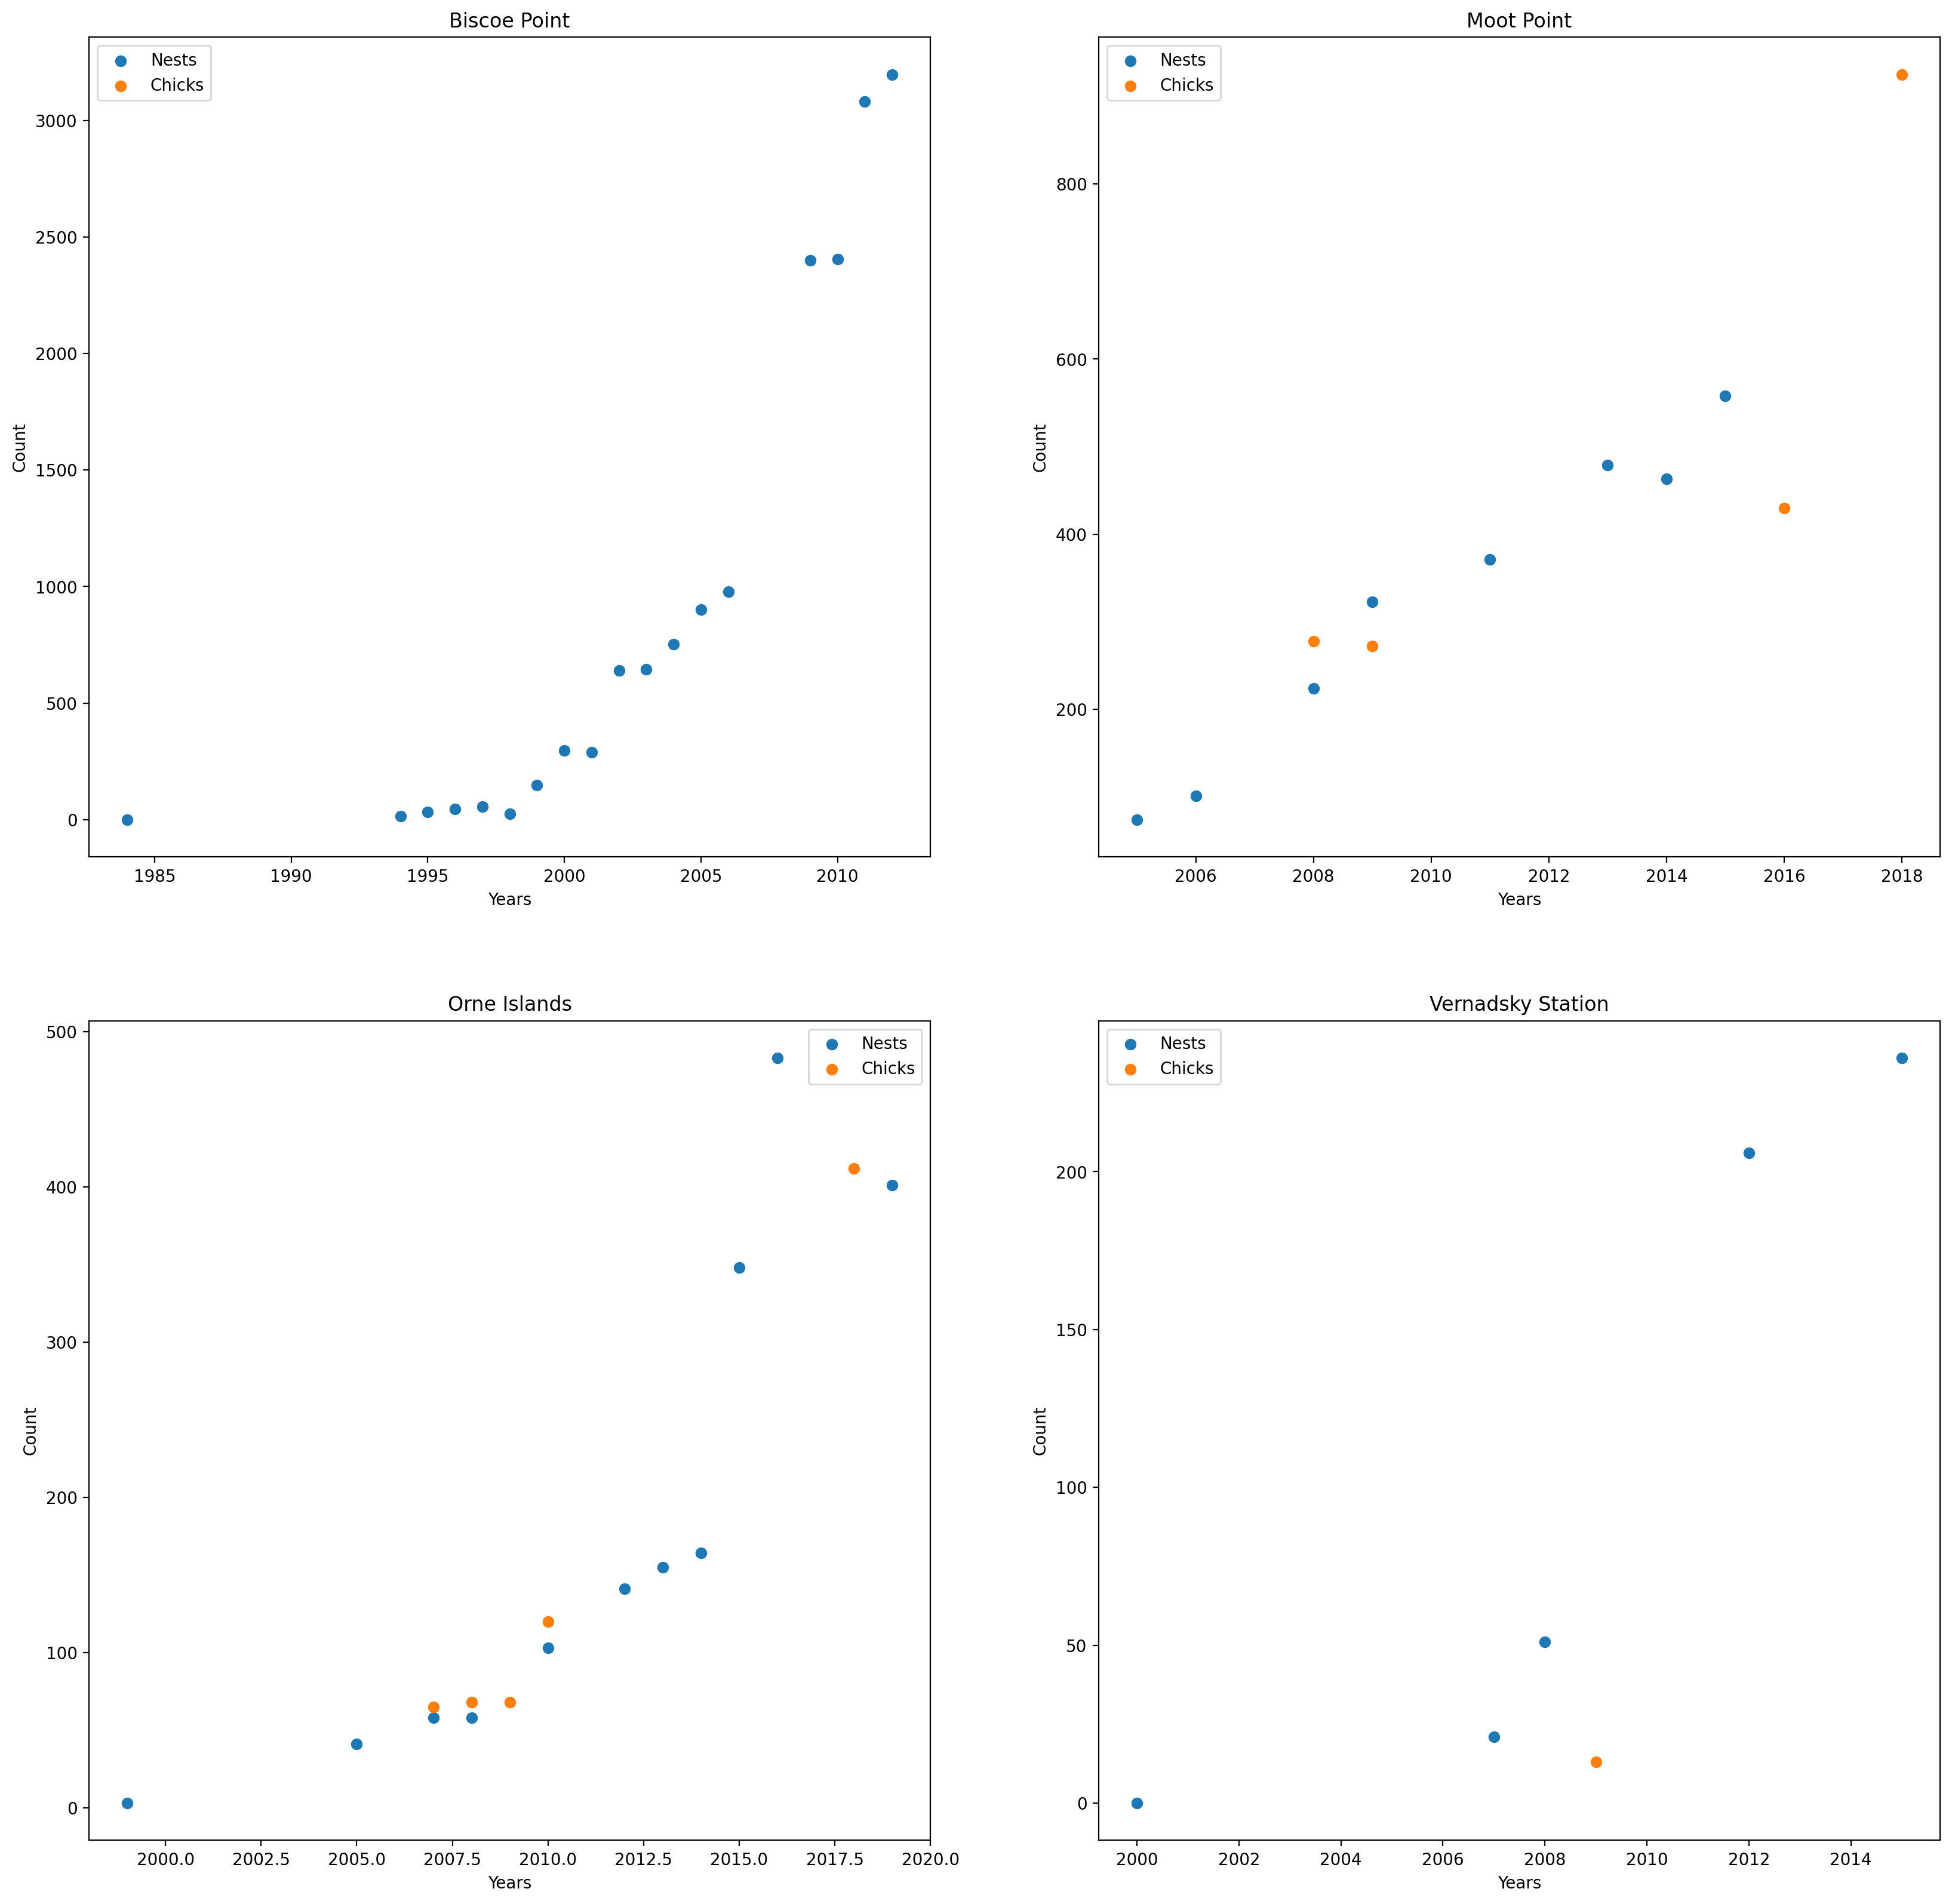

In [10]:
for i, site in enumerate(site_names):
    plt.subplot(2, 2, i+1)
    plt.scatter(GentooData[site+' Years'], GentooData[site+' Counts'][0])
    plt.scatter(GentooData[site+' Years'], GentooData[site+' Counts'][1])
    plt.title(site)
    plt.xlabel('Years')
    plt.ylabel('Count')
    plt.legend(['Nests', 'Chicks'])
plt.show()

## Adelie Time Series

In [11]:
dfad = pd.read_excel('AdelieDataTimeSeries.xlsx', header=0)
dfad

,site id,site name,region,ccamlr region,date,month,year,count,count type,accuracy
0,ARDL,Ardley Island,South Shetland Islands,48.1,1979-12-01 00:00:00,DEC,1979,811,N,1
1,ARDL,Ardley Island,South Shetland Islands,48.1,xx/xx/1980(81),NaN,1980,960,N,3
2,ARDL,Ardley Island,South Shetland Islands,48.1,xx/xx/1981(82),NaN,1981,1314,N,1
3,ARDL,Ardley Island,South Shetland Islands,48.1,xx/xx/1983(84),NaN,1983,1074,N,1
4,ARDL,Ardley Island,South Shetland Islands,48.1,xx/xx/1984(85),NaN,1984,1331,N,1
...,...,...,...,...,...,...,...,...,...,...
458,PCHA,Port Charcot,Central-west Antarctic Peninsula,48.1,2013-12-11 00:00:00,DEC,2013,12,N,1
459,PCHA,Port Charcot,Central-west Antarctic Peninsula,48.1,2014-12-21 00:00:00,DEC,2014,10,N,1
460,PCHA,Port Charcot,Central-west Antarctic Peninsula,48.1,2016-02-17 00:00:00,FEB,2015,6,C,1
461,PCHA,Port Charcot,Central-west Antarctic Peninsula,48.1,2016-12-24 00:00:00,DEC,2016,8,N,1


In [12]:
dfad.drop(dfad.columns.difference(['site name','year', 'count', 'accuracy', 'count type']), 1, inplace=True)
dfad.head()

,site name,year,count,count type,accuracy
0,Ardley Island,1979,811,N,1
1,Ardley Island,1980,960,N,3
2,Ardley Island,1981,1314,N,1
3,Ardley Island,1983,1074,N,1
4,Ardley Island,1984,1331,N,1


In [13]:
site_names = list(set(dfad['site name']))
print(len(site_names))
site_names

19


['Cape Royds',
 'Port Charcot',
 'Franklin Island East',
 'Cape Hallett',
 'Petermann Island',
 'Christine Island',
 'Humble Island',
 'Bechervaise Island',
 'Cape Bird South',
 'Litchfield Island',
 'Llano Point',
 'Cape Bird North',
 'Cormorant Island',
 'Cape Adare',
 'Ardley Island',
 'Cape Bird Middle',
 'Beaufort Island',
 'Cape Crozier',
 'Penguin Island']

In [14]:
AdelieData = {}
for site in site_names:
    dfad_local = dfad[dfad['site name']==site]
    # Find years for this site
    start_year = min(dfad_local['year'])
    stop_year = max(dfad_local['year'])
    years = np.arange(start_year, stop_year+1)
    # Dataframes for nest and chick counts
    dfad_local_nests = dfad_local[dfad['count type']=='N']
    dfad_local_chicks = dfad_local[dfad['count type']=='C']
    # Years nest and chick counts were collected
    nest_years = dfad_local_nests['year'].to_list()
    chick_years = dfad_local_chicks['year'].to_list()
    # Obtain counts and accuracy
    nest_counts = dfad_local_nests['count'].to_list()
    chick_counts = dfad_local_chicks['count'].to_list()
    nest_acc = dfad_local_nests['accuracy'].to_list()
    chick_acc = dfad_local_chicks['accuracy'].to_list()
    # Initialize array to store counts and accuracy
    data = np.ones((2, len(years)))*np.nan
    err = np.ones((2, len(years)))*np.nan
    for i, year in enumerate(nest_years):
        data[0][year==years] = nest_counts[i]
        err[0][year==years] = acc_key[str(nest_acc[i])]
    for i, year in enumerate(chick_years):
        data[1][year==years] = chick_counts[i]
        err[1][year==years] = acc_key[str(chick_acc[i])]
    AdelieData[site+' Counts'] = data
    AdelieData[site+' Years'] = years
    AdelieData[site+' Errors'] = err

<ipython-input-14-44f45a1063a4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfad_local_nests = dfad_local[dfad['count type']=='N']
<ipython-input-14-44f45a1063a4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfad_local_chicks = dfad_local[dfad['count type']=='C']


In [15]:
AdelieData
f = open("adelie_data.pkl","wb")
pickle.dump(AdelieData, f)
f.close()

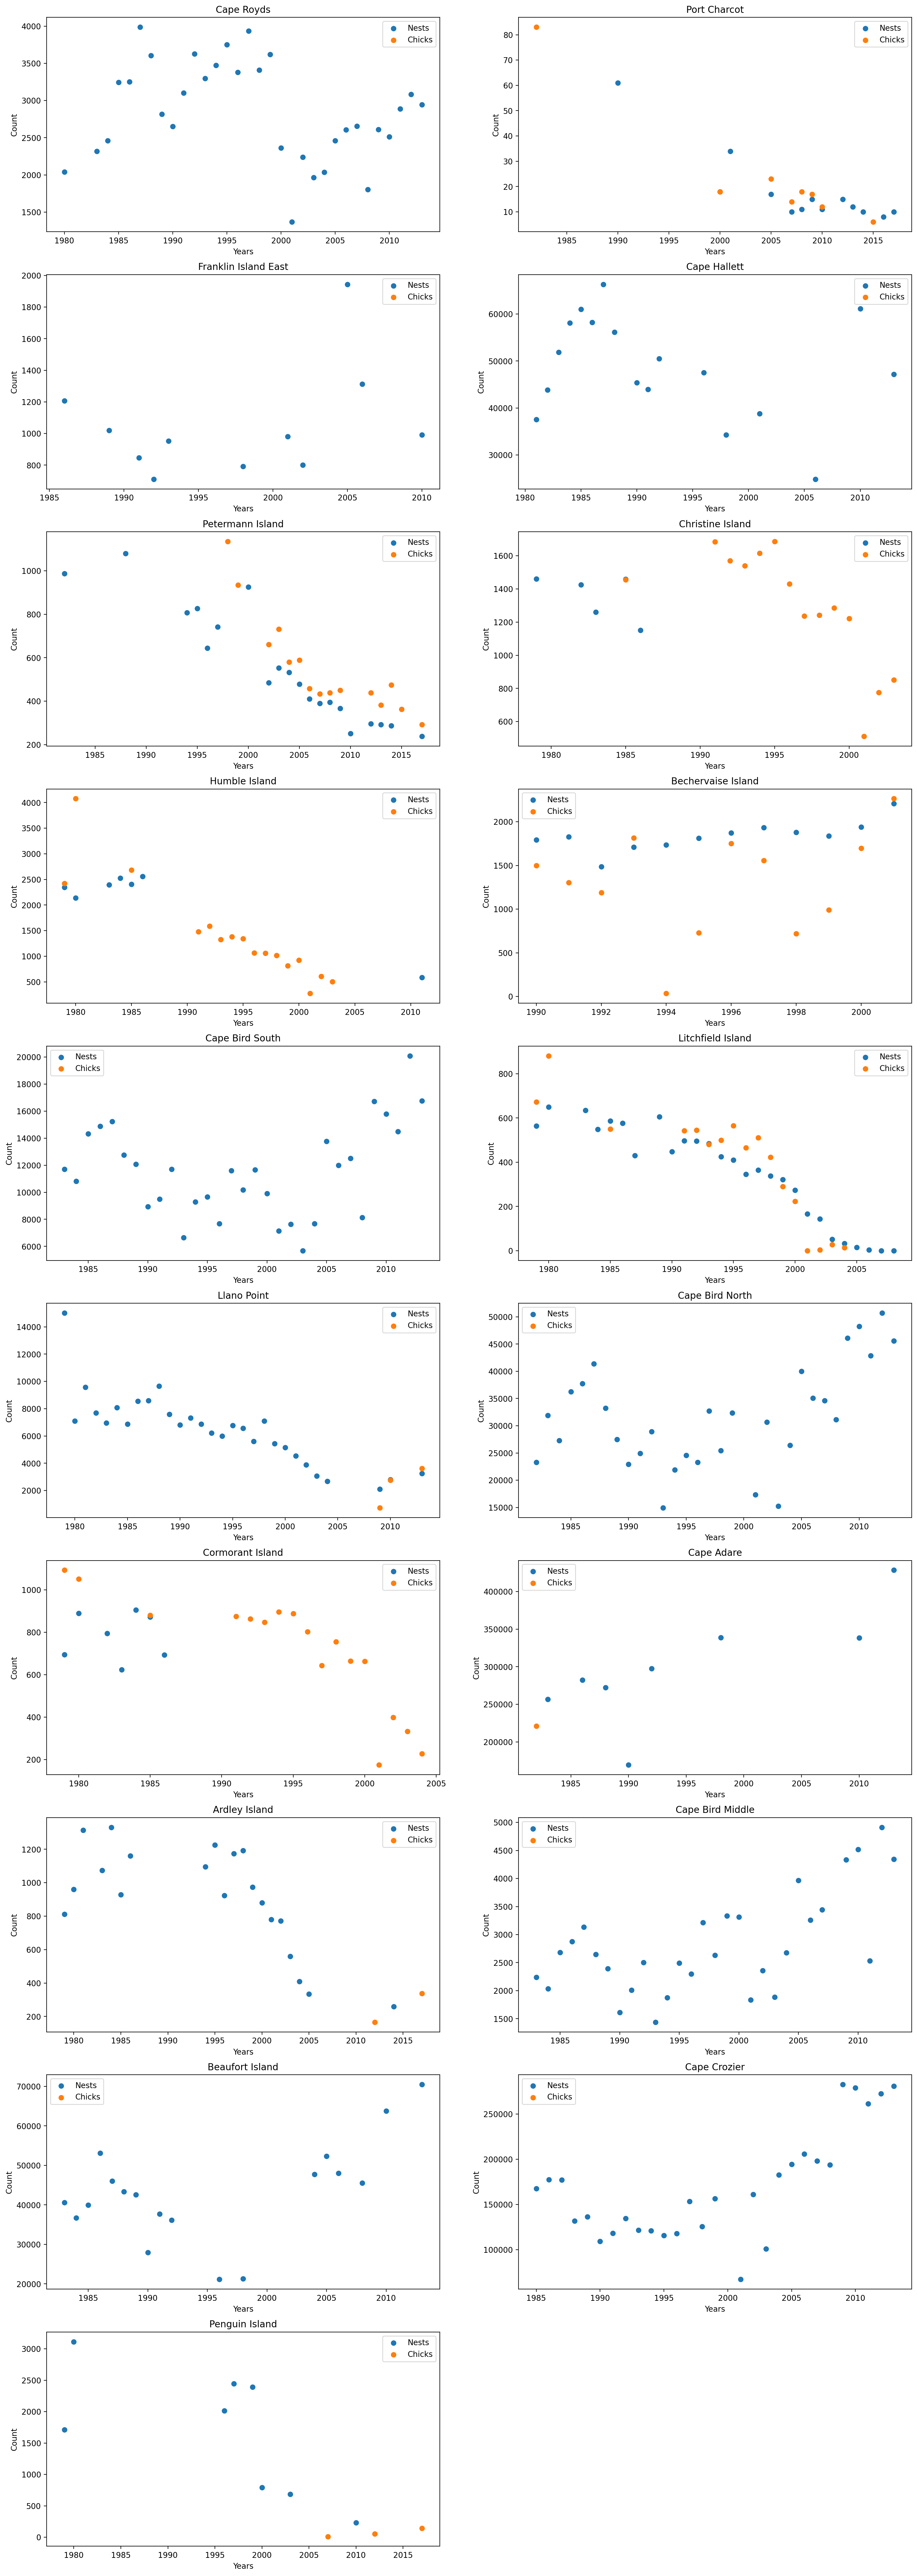

In [18]:
plt.rcParams['figure.figsize'] = [20, 60]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
for i, site in enumerate(site_names):
    plt.subplot(10, 2, i+1)
    plt.scatter(AdelieData[site+' Years'], AdelieData[site+' Counts'][0])
    plt.scatter(AdelieData[site+' Years'], AdelieData[site+' Counts'][1])
    plt.title(site)
    plt.xlabel('Years')
    plt.ylabel('Count')
    plt.legend(['Nests', 'Chicks'])
plt.show()